# Introduction to React

Welcome to introduction to react. If you are here, I am assuming you are starting out or curious about learning front-end developement. In this article I will introduce you to the React Framework. We will be writing more code and less words so you wont be bored.

*Note: This article assumes you have working knoweledge of HTML and basic Javascript. If not, take few hours to watch a tutorial on Youtube to get yourself familiar with it.*

let's get started.

## What is React?

React is a Javascipt based library to create User Inteferaces (also called front-end) for websites. Though it is possible to build complex user interfaces with vanilla javascript, but to do so will be very hard and on top of that error-prone and cumbersome to maintain. This is where **React** shines. It simiplifies the creation of complex user intefaces by provoding a declaritive way to define the desired end state of the UI.

## What are React components?

Components are resuable building blocks which are combined to compose the final user interface. 
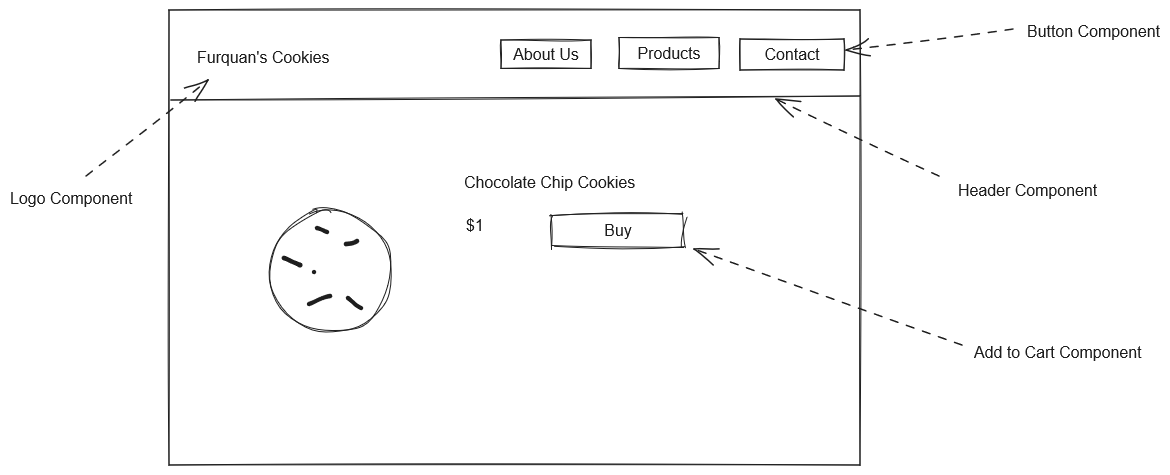
React champions the idea of breaking a web pages into resuable building blocks because this is an approach that allows developers to work on small, manageable chunks of code. It's easier and more maintainable than working on a single, huge HTML file.

### Sturcture of components

In [18]:
import React from 'npm:react';
import { renderToString } from 'npm:react-dom/server';
import { useState } from 'npm:react';

function SubmitButton() {
    const [isSubmitted, setIsSubmitted] = useState(false);
    
    function submitHandler() {
        setIsSubmitted(true);
    };
    
    return (
        <button onClick={submitHandler}>
        { isSubmitted ? 'Loading..' : 'Submit'}
        </button>
    ); 
};

export default SubmitButton;

[Function: SubmitButton]

This a typical syntax of a component. PascalCased function name `SubmitButton`, a state handler, here `isSubmitted, setIsSubmitted`, a component function that contains the logic and return statement that gives a neatly packaged JSX code.

One would store a component like this is a seperate file (e.g. `SubmitButton.js`) store inside a `/components` folder which resides in the `/src` folder of your React project and them import into other component files that need this compnents. For example:

```js
import SubmitButton from './submit-button' 
```

Let's see how one can use the SubmitButton component inside another component.

In [22]:
function AuthForm() {
        return (
            <form>
                <input type="text" />
                <SubmitButton />
            </form>
        );
    };
export default AuthForm;

[Function: AuthForm]

In [20]:

const componentHTML = renderToString(<AuthForm />);

In [21]:
import { html } from "https://deno.land/x/display/mod.ts";
html`<div>${componentHTML}</div>`;

Submit

As you can see above, after rendering our AuthForm component we can also see the SubmitButton component we defined seprately. 

This is demonstrates the usefulness of React. Instead of putting all the code for our UI in one HTML file, we can define components seprately and import them wherever we want. This has an added benefit of code resuablity so we may not need to reinvent the wheel every time.

## Built-In Compnents

Notice the `JSX` returned by these components, you will find standard HTML elements like `<div>`,`<h2>`,`<p>`, `<form>` and so on. 
```js
 return (
            <form>
                <input type="text" />
                <SubmitButton />
            </form>
        );
```
when using React, your are **not** creating new HTML elements that the browser will diplay and handle, you are creating components that *only work inside the React enviornemnt.* Before they reach the browser, they have been evaluated by React and 'translated' into DOM-manipulating JavaScript instructions. It's important to keep in mind that all this JSX code is a feature that is not part of the JavaScript language itself. It's basically **syntactical sugar** (i.e a simplificaition regarding code syntax) provided by the React library. also to note that elements like `<div>`, when used in JSX code, are **not** normal HTML elements because you **don't write HTML code**. 

Therefore, these `<div>` and `<h2>` elements used inside the JSX of react components are also just React components in the end. When working with React, one therefore always end up with these primitives - these **built-in components** that are later translated to browser instructions that generate and append or remove normal DOM elements. 

## Naming Conventions

One can generally name React component functions however you want-at least in the file where you are defining them. But it is a common convention to use **PascalCase** naming conventions, wherein the first character is uppercase and multiple words are grouped into one single word.

It is a requirement for compnenets to be PascleCased for to be used. You **can't** use you components like this `<submitbutton />`, React forced you to use an uppercase starting character when using them in JSX code. This rule exsits to give React a clear and easy way of telling custom components apart from built-in components like `<div>` etc.


## JSX vs Vanilla JavaScript 

React projects typically contains lots of JSX code. Most custom components will return JSX code snippets. JSX is feature that's not part of vanilla JavaScript. What can be confusing, though, is that it's also not directly part of the React library. Instead, JSX is syntactical sugar that is provided by the build workflow that's part of the overall React project. 

When you start the development web server via `npm start` or build React app for production (i.e for deployment) via `npm run build`, you kick off a process that transform this JSX code back to regular JavaScript instructions. As a developers, you don't see those final instructions but React, the library, actually recieves and evaluates them. 

The component:

```js
function Greeting() {
        return <p>Hello World!</p>;
    };
```

The JSX code returned by this component would be translated into the following vanilla JavaScript code:
```js
function Greeting() {
        return React.createElement('p', {}, 'Hello World!');
    };
```

`createElement()` is a method built into Reach library. It instruct React to create a paragraph element with Hello World!. Therefore, once all elements for all JSX elements have been create, the virtual DOM in tranlated into real DOM-manipulating instructions that are executed by the browser.

### JSX elements are treated like regular javascript values

Because JSX is just syntactical sugar that gets transformend to `React.createElement()` calls, its worthy to note that JSX elements are just **regular JavaScript values**. Therefore, the same rules that apply to all JavaScript values apply to JSX elements. As a result where only one value is expected after `return` statement, you must have one JSX element:

error:
```js
function App() {
    return (
        <p>Hello World!</p>
        <p>How are you doing!</p>
    );
};
```

Here you are returning two values (two different paragraphs) instead of just one. This is not allowed in JavaScript.

Two return two values, a special kind of wrapping component is used: a React **fragment** (`<>... </>`). It's a built-in component that serves the purpose of allowing you to return or define sibling JSX elements.

```js
function App() {
    return (
    <>
        <p>Hello World!</p>
        <p>How are you doing!</p>
    </>
    )
}
```

# Summary

* React uses components: resuable building blocks that are combined to define the final user interface.
* Components must return renderable content, typicall JSX code which defines the HTML code that should be produced in the end.
* React provides a lot of built-in components: besides special components like `<>...</>` you get components for all standard HTML elements.
* Custom components written by you must follow **PascalCase** naming convention.
* JSX is neither HTML nor a standard JavaScript feature, instead it's **syntactical sugar** provided by build workflows that are part of all React projects.
* When using JSX elements, you must not have sibling elements in places where single values are expected (e.g., directly after *return* keyword). One can use the fragment component `<>..</>` to wrap multiple elements within it.
